In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as pl

from subprocess import check_output
from datetime import time

In [2]:
df=pd.read_csv('D:/abhipraja/codes/dataset/sgdclassifer.csv')
print(df.shape)
df.head()

(37776, 10)


,date,time,username,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [3]:
df=df.drop(['date','time','username'],axis=1)
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:

print(df.describe())
data=df.values
x=data[:,1:]
y=data[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

           activity  acceleration_x  acceleration_y  acceleration_z  \
count  37776.000000    37776.000000    37776.000000    37776.000000   
mean       0.627594        0.591737       -0.576499       -0.518629   
std        0.483452        0.736011        0.654141        0.632200   
min        0.000000       -2.193100       -2.656300       -3.753800   
25%        0.000000        0.182600       -1.024300       -0.807025   
50%        1.000000        0.358000       -0.778900       -0.309750   
75%        1.000000        0.770725       -0.286000       -0.119800   
max        1.000000        5.603300        1.840900        1.040100   

             gyro_x        gyro_y        gyro_z  
count  37776.000000  37776.000000  37776.000000  
mean       0.046902      0.138536     -0.001761  
std        1.061266      1.179670      2.173081  
min       -3.475300     -6.543200     -9.480000  
25%       -0.768625     -0.549525     -1.715000  
50%        0.023950      0.094150      0.073450  
75%       

In [5]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [6]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss='hinge',penalty='l2')

In [7]:
model.fit(x_train,y_train)

SGDClassifier()

In [8]:
model.score(x_test,y_test)

0.8655230834392207

c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


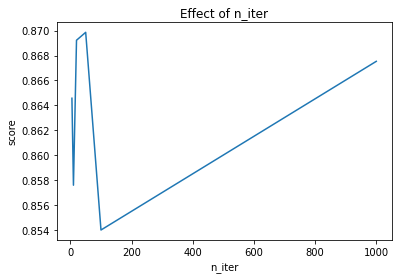

In [9]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
  
pl.title("Effect of n_iter")
pl.xlabel("n_iter")
pl.ylabel("score")
pl.plot(n_iters, scores) 


c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


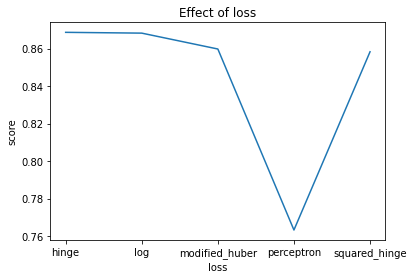

In [10]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    model = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
  
pl.title("Effect of loss")
pl.xlabel("loss")
pl.ylabel("score")
x = np.arange(len(losses))
pl.xticks(x, losses)
pl.plot(x, scores) 

In [11]:
np.random.shuffle(data)
from sklearn.model_selection import GridSearchCV

params={
    'loss':['hinge','log','sqaured_hinge','modified_huber'],
    'alpha':[0.0001,0.001,0.01,0.1],
    'penalty':['l2','l1','none'],
}

model=SGDClassifier(max_iter=1000)
clf=GridSearchCV(model,param_grid=params)

In [12]:
x=data[:,1:]
y=data[:,0]
clf.fit(x,y)
print(clf.best_score_)

c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be 

0.8687525781467054


c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 890, in fit
    return self._fit(
  File "c:\Users\abhip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklea

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_pred=cross_val_predict(model,x_train,y_train)
f1_score(y_train,y_pred)


0.8924054222675969